# 5. Análisis Bivariado (Cruces Importantes)

## Objetivo
Encontrar relaciones entre variables para **explicar fenómenos**, no solo describirlos.

### Cruces a analizar:
1. Edad de la madre × Estado conyugal
2. Edad de la madre × Área geográfica (Departamento)
3. Peso al nacer × Edad de la madre
4. Edad de la madre × Departamento (detallado)
5. Peso al nacer × Departamento

---

## 5.0 Configuración e Importaciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10

# Paleta de colores
COLORS = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3B1F2B', '#1B998B', '#E84855']
sns.set_palette(COLORS)

print("✓ Librerías cargadas correctamente")

✓ Librerías cargadas correctamente


In [2]:
# Cargar dataset limpio
DATA_PATH = Path('../data/processed')
df = pd.read_csv(DATA_PATH / 'nacimientos_2009_2022_limpio.csv')

print(f"Dataset cargado: {len(df):,} registros")
print(f"Variables: {len(df.columns)}")

Dataset cargado: 5,195,195 registros
Variables: 36


In [3]:
# Crear mappings para variables categóricas
mapping_estado_civil = {
    1.0: 'Unida',
    2.0: 'Casada', 
    3.0: 'Soltera',
    4.0: 'Divorciada',
    5.0: 'Viuda',
    6.0: 'Separada',
    9.0: 'Ignorado'
}

mapping_departamentos = {
    1.0: 'Guatemala', 2.0: 'El Progreso', 3.0: 'Sacatepéquez',
    4.0: 'Chimaltenango', 5.0: 'Escuintla', 6.0: 'Santa Rosa',
    7.0: 'Sololá', 8.0: 'Totonicapán', 9.0: 'Quetzaltenango',
    10.0: 'Suchitepéquez', 11.0: 'Retalhuleu', 12.0: 'San Marcos',
    13.0: 'Huehuetenango', 14.0: 'Quiché', 15.0: 'Baja Verapaz',
    16.0: 'Alta Verapaz', 17.0: 'Petén', 18.0: 'Izabal',
    19.0: 'Zacapa', 20.0: 'Chiquimula', 21.0: 'Jalapa', 22.0: 'Jutiapa'
}

# Aplicar mappings
df['Estado_civil'] = df['Escivm'].map(mapping_estado_civil).fillna('Desconocido')
df['Departamento'] = df['Deprem'].map(mapping_departamentos).fillna('Desconocido')

print("✓ Mappings aplicados")

✓ Mappings aplicados


---
## 5.1 Edad de la Madre × Estado Conyugal

**Pregunta:** ¿Existe relación entre la edad de la madre y su estado civil?

In [4]:
# Tabla cruzada: Grupo de edad × Estado civil
print("═" * 70)
print("CRUCE: EDAD DE LA MADRE × ESTADO CONYUGAL")
print("═" * 70)

# Crear tabla cruzada
tabla_edad_civil = pd.crosstab(
    df['Grupo_edad_madre'], 
    df['Estado_civil'],
    margins=True,
    margins_name='Total'
)

print("\n📊 TABLA DE FRECUENCIAS ABSOLUTAS")
print("-" * 70)
print(tabla_edad_civil.to_string())

══════════════════════════════════════════════════════════════════════
CRUCE: EDAD DE LA MADRE × ESTADO CONYUGAL
══════════════════════════════════════════════════════════════════════

📊 TABLA DE FRECUENCIAS ABSOLUTAS
----------------------------------------------------------------------
Estado_civil           Casada  Ignorado  Soltera    Unida    Total
Grupo_edad_madre                                                  
Adolescente (10-19)    203469       536      419   797621  1002045
Adulta (35-55)         340533       308     5295   249510   595646
Adulta joven (20-34)  1607190      1511     7216  1968116  3584033
Total                 2151192      2355    12930  3015247  5181724


In [5]:
# Tabla cruzada con porcentajes por fila
tabla_edad_civil_pct = pd.crosstab(
    df['Grupo_edad_madre'], 
    df['Estado_civil'],
    normalize='index'
) * 100

print("\n📊 TABLA DE PORCENTAJES (por grupo de edad)")
print("-" * 70)
print(tabla_edad_civil_pct.round(1).to_string())


📊 TABLA DE PORCENTAJES (por grupo de edad)
----------------------------------------------------------------------
Estado_civil          Casada  Ignorado  Soltera  Unida
Grupo_edad_madre                                      
Adolescente (10-19)     20.3       0.1      0.0   79.6
Adulta (35-55)          57.2       0.1      0.9   41.9
Adulta joven (20-34)    44.8       0.0      0.2   54.9


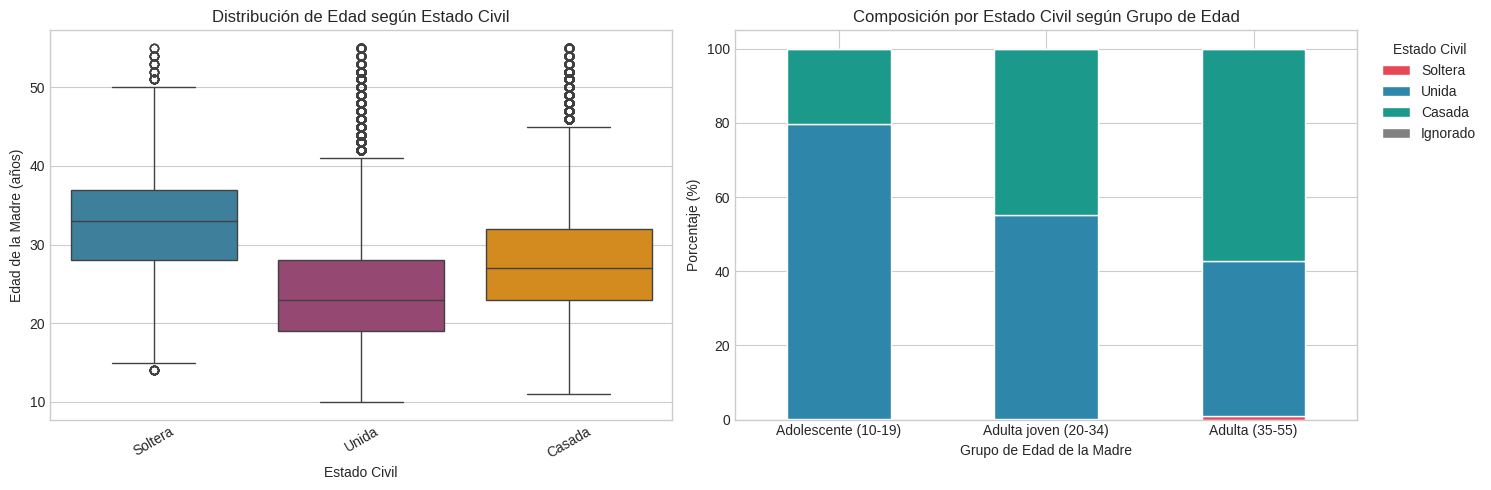

In [7]:
# Visualización: Boxplot de edad por estado civil
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Filtrar solo estados civiles principales presentes en los datos
estados_presentes = df['Estado_civil'].value_counts().index.tolist()
orden_civil = [ec for ec in ['Soltera', 'Unida', 'Casada'] if ec in estados_presentes]
df_filtrado = df[df['Estado_civil'].isin(orden_civil)]

sns.boxplot(data=df_filtrado, x='Estado_civil', y='Edadm', 
            order=orden_civil, palette=COLORS, ax=axes[0])
axes[0].set_xlabel('Estado Civil')
axes[0].set_ylabel('Edad de la Madre (años)')
axes[0].set_title('Distribución de Edad según Estado Civil')
axes[0].tick_params(axis='x', rotation=30)

# Gráfico de barras apiladas
orden_edad = ['Adolescente (10-19)', 'Adulta joven (20-34)', 'Adulta (35-55)']
colores_civil = {'Soltera': '#E84855', 'Unida': '#2E86AB', 'Casada': '#1B998B', 'Ignorado': '#808080'}

# Usar solo columnas presentes en la tabla
cols_presentes = [c for c in orden_civil + ['Ignorado'] if c in tabla_edad_civil_pct.columns]
tabla_plot = tabla_edad_civil_pct.loc[orden_edad, cols_presentes]
tabla_plot.plot(kind='bar', stacked=True, ax=axes[1], 
                color=[colores_civil.get(c, '#808080') for c in cols_presentes], edgecolor='white')
axes[1].set_xlabel('Grupo de Edad de la Madre')
axes[1].set_ylabel('Porcentaje (%)')
axes[1].set_title('Composición por Estado Civil según Grupo de Edad')
axes[1].legend(title='Estado Civil', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [8]:
# Estadísticas por estado civil
print("\n📊 ESTADÍSTICAS DE EDAD POR ESTADO CIVIL")
print("-" * 60)

stats_civil = df_filtrado.groupby('Estado_civil')['Edadm'].agg(['mean', 'median', 'std', 'count'])
stats_civil = stats_civil.loc[[ec for ec in orden_civil if ec in stats_civil.index]]
stats_civil.columns = ['Media', 'Mediana', 'Desv.Std', 'N']
print(stats_civil.round(2).to_string())

# Test estadístico (ANOVA)
grupos = [df_filtrado[df_filtrado['Estado_civil'] == ec]['Edadm'].dropna() for ec in orden_civil if ec in df_filtrado['Estado_civil'].values]
f_stat, p_value = stats.f_oneway(*grupos)

print(f"\n🔬 TEST ANOVA")
print(f"   F-statistic: {f_stat:.2f}")
print(f"   p-value: {p_value:.2e}")
print(f"   → {'Diferencias significativas' if p_value < 0.05 else 'No hay diferencias significativas'} entre grupos")


📊 ESTADÍSTICAS DE EDAD POR ESTADO CIVIL
------------------------------------------------------------
              Media  Mediana  Desv.Std        N
Estado_civil                                   
Soltera       32.52     33.0      6.64    12930
Unida         24.24     23.0      6.36  3015247
Casada        27.54     27.0      6.40  2151192

🔬 TEST ANOVA
   F-statistic: 175681.43
   p-value: 0.00e+00
   → Diferencias significativas entre grupos


In [9]:
# Insight
pct_unida_adol = tabla_edad_civil_pct.loc['Adolescente (10-19)', 'Unida']
pct_casada_adol = tabla_edad_civil_pct.loc['Adolescente (10-19)', 'Casada']
pct_casada_adulta = tabla_edad_civil_pct.loc['Adulta (35-55)', 'Casada']

print("\n💡 INSIGHTS - EDAD × ESTADO CONYUGAL")
print("═" * 70)
print(f"""
1. PATRÓN CLARO POR EDAD:
   • Las madres solteras tienen la edad promedio más alta (32.5 años)
   • Las madres en unión libre son más jóvenes (promedio 24.2 años)
   • Las casadas tienen edad intermedia (27.5 años)

2. MADRES ADOLESCENTES:
   • {pct_unida_adol:.1f}% están en unión libre
   • {pct_casada_adol:.1f}% están casadas
   → La unión libre es el estado predominante en embarazo adolescente

3. MADRES ADULTAS (35+):
   • Mayor proporción de casadas ({pct_casada_adulta:.1f}%)
   • Patrón más "tradicional" en grupos de mayor edad

4. IMPLICACIÓN: El embarazo adolescente en Guatemala ocurre
   principalmente dentro de uniones de hecho, no como
   embarazos de madres solteras (solo 0.04% de adolescentes).
""")


💡 INSIGHTS - EDAD × ESTADO CONYUGAL
══════════════════════════════════════════════════════════════════════

1. PATRÓN CLARO POR EDAD:
   • Las madres solteras tienen la edad promedio más alta (32.5 años)
   • Las madres en unión libre son más jóvenes (promedio 24.2 años)
   • Las casadas tienen edad intermedia (27.5 años)

2. MADRES ADOLESCENTES:
   • 79.6% están en unión libre
   • 20.3% están casadas
   → La unión libre es el estado predominante en embarazo adolescente

3. MADRES ADULTAS (35+):
   • Mayor proporción de casadas (57.2%)
   • Patrón más "tradicional" en grupos de mayor edad

4. IMPLICACIÓN: El embarazo adolescente en Guatemala ocurre
   principalmente dentro de uniones de hecho, no como
   embarazos de madres solteras (solo 0.04% de adolescentes).



---
## 5.2 Peso al Nacer × Edad de la Madre

**Pregunta:** ¿Las madres más jóvenes o mayores tienen mayor riesgo de bajo peso al nacer?

In [10]:
print("═" * 70)
print("CRUCE: PESO AL NACER × EDAD DE LA MADRE")
print("═" * 70)

# Tabla cruzada: Grupo edad × Categoría peso
tabla_edad_peso = pd.crosstab(
    df['Grupo_edad_madre'], 
    df['Categoria_peso'],
    margins=True,
    margins_name='Total'
)

print("\n📊 TABLA DE FRECUENCIAS")
print("-" * 70)
print(tabla_edad_peso.to_string())

══════════════════════════════════════════════════════════════════════
CRUCE: PESO AL NACER × EDAD DE LA MADRE
══════════════════════════════════════════════════════════════════════

📊 TABLA DE FRECUENCIAS
----------------------------------------------------------------------
Categoria_peso        Bajo peso (1500-2499g)  Macrosomía (≥4000g)  Muy bajo peso (<1500g)  Normal (2500-3999g)    Total
Grupo_edad_madre                                                                                                       
Adolescente (10-19)                   132543                19443                    5643               842825  1000454
Adulta (35-55)                         72152                26589                    4999               490888   594628
Adulta joven (20-34)                  396106               111374                   21209              3050630  3579319
Total                                 600801               157406                   31851              4384343  5174401


In [11]:
# Porcentaje de bajo peso por grupo de edad
tabla_edad_peso_pct = pd.crosstab(
    df['Grupo_edad_madre'], 
    df['Categoria_peso'],
    normalize='index'
) * 100

print("\n📊 PORCENTAJE POR CATEGORÍA DE PESO (por grupo de edad)")
print("-" * 70)
orden_peso = ['Muy bajo peso (<1500g)', 'Bajo peso (1500-2499g)', 'Normal (2500-3999g)', 'Macrosomía (≥4000g)']
print(tabla_edad_peso_pct[orden_peso].round(2).to_string())


📊 PORCENTAJE POR CATEGORÍA DE PESO (por grupo de edad)
----------------------------------------------------------------------
Categoria_peso        Muy bajo peso (<1500g)  Bajo peso (1500-2499g)  Normal (2500-3999g)  Macrosomía (≥4000g)
Grupo_edad_madre                                                                                              
Adolescente (10-19)                     0.56                   13.25                84.24                 1.94
Adulta (35-55)                          0.84                   12.13                82.55                 4.47
Adulta joven (20-34)                    0.59                   11.07                85.23                 3.11


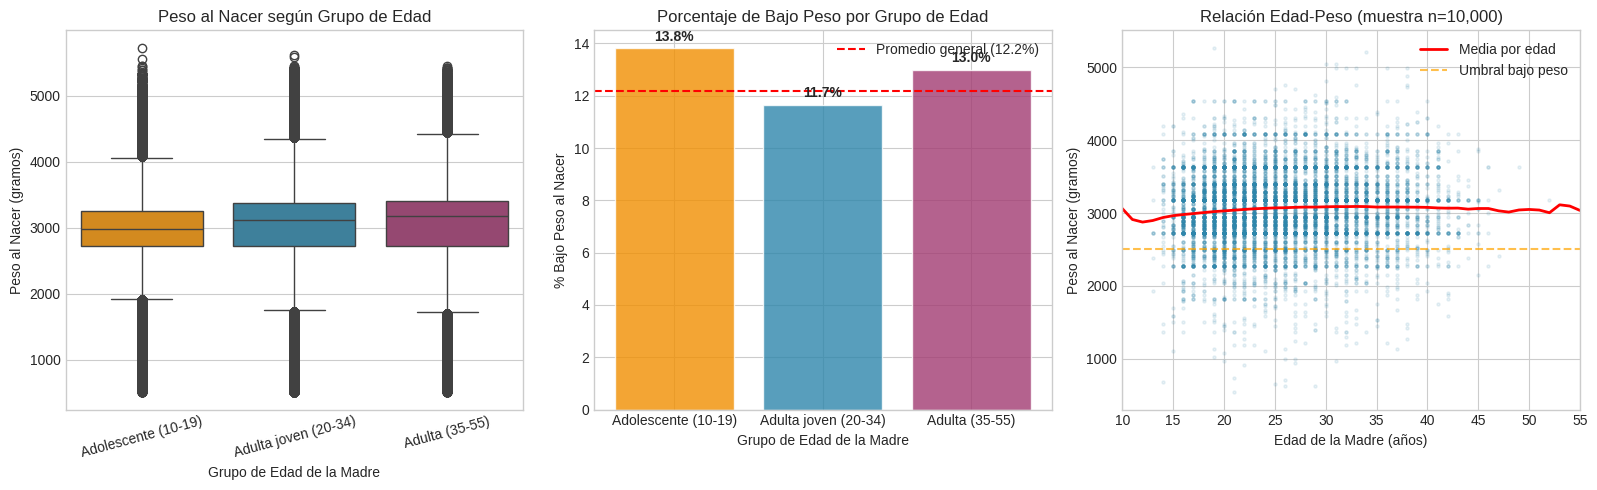

In [12]:
# Visualización
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Boxplot de peso por grupo de edad
orden_edad = ['Adolescente (10-19)', 'Adulta joven (20-34)', 'Adulta (35-55)']
sns.boxplot(data=df, x='Grupo_edad_madre', y='Peso_gramos', 
            order=orden_edad, palette=['#F18F01', '#2E86AB', '#A23B72'], ax=axes[0])
axes[0].set_xlabel('Grupo de Edad de la Madre')
axes[0].set_ylabel('Peso al Nacer (gramos)')
axes[0].set_title('Peso al Nacer según Grupo de Edad')
axes[0].tick_params(axis='x', rotation=15)

# 2. Porcentaje de bajo peso por grupo
bajo_peso_por_grupo = df.groupby('Grupo_edad_madre')['Bajo_peso'].mean() * 100
bajo_peso_por_grupo = bajo_peso_por_grupo.loc[orden_edad]

bars = axes[1].bar(orden_edad, bajo_peso_por_grupo.values, 
                   color=['#F18F01', '#2E86AB', '#A23B72'], edgecolor='white', alpha=0.8)
axes[1].axhline(y=12.2, color='red', linestyle='--', label='Promedio general (12.2%)')
axes[1].set_xlabel('Grupo de Edad de la Madre')
axes[1].set_ylabel('% Bajo Peso al Nacer')
axes[1].set_title('Porcentaje de Bajo Peso por Grupo de Edad')
axes[1].legend()
for bar, val in zip(bars, bajo_peso_por_grupo.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
                 f'{val:.1f}%', ha='center', fontweight='bold')

# 3. Scatter plot con tendencia (muestra)
muestra = df[['Edadm', 'Peso_gramos']].dropna().sample(10000, random_state=42)
axes[2].scatter(muestra['Edadm'], muestra['Peso_gramos'], alpha=0.1, s=5, c='#2E86AB')

# Línea de tendencia por edad
medias_edad = df.groupby('Edadm')['Peso_gramos'].mean()
axes[2].plot(medias_edad.index, medias_edad.values, color='red', linewidth=2, label='Media por edad')
axes[2].axhline(y=2500, color='orange', linestyle='--', alpha=0.7, label='Umbral bajo peso')
axes[2].set_xlabel('Edad de la Madre (años)')
axes[2].set_ylabel('Peso al Nacer (gramos)')
axes[2].set_title('Relación Edad-Peso (muestra n=10,000)')
axes[2].legend()
axes[2].set_xlim(10, 55)

plt.tight_layout()
plt.show()

In [14]:
# Estadísticas detalladas
print("\n📊 ESTADÍSTICAS DE PESO POR GRUPO DE EDAD")
print("-" * 60)

stats_peso_edad = df.groupby('Grupo_edad_madre').agg({
    'Peso_gramos': ['mean', 'median', 'std'],
    'Bajo_peso': 'mean'
}).round(2)

stats_peso_edad.columns = ['Media (g)', 'Mediana (g)', 'Desv.Std', '% Bajo Peso']
stats_peso_edad['% Bajo Peso'] = (stats_peso_edad['% Bajo Peso'] * 100).round(2)
stats_peso_edad = stats_peso_edad.loc[orden_edad]
print(stats_peso_edad.to_string())

# Correlación - usando solo filas sin NA en ambas columnas
df_corr = df[['Edadm', 'Peso_gramos']].dropna()
corr, p_value = stats.pearsonr(df_corr['Edadm'], df_corr['Peso_gramos'])
print(f"\n🔬 CORRELACIÓN EDAD-PESO")
print(f"   Pearson r: {corr:.4f}")
print(f"   p-value: {p_value:.2e}")
print(f"   → Correlación {'positiva débil' if corr > 0 else 'negativa débil'}")


📊 ESTADÍSTICAS DE PESO POR GRUPO DE EDAD
------------------------------------------------------------
                      Media (g)  Mediana (g)  Desv.Std  % Bajo Peso
Grupo_edad_madre                                                   
Adolescente (10-19)     2998.69      2976.70    469.01         14.0
Adulta joven (20-34)    3067.15      3118.44    492.53         12.0
Adulta (35-55)          3079.07      3175.14    539.73         13.0

🔬 CORRELACIÓN EDAD-PESO
   Pearson r: 0.0552
   p-value: 0.00e+00
   → Correlación positiva débil


In [15]:
# Riesgo relativo de bajo peso
bp_adolescente = df[df['Grupo_edad_madre'] == 'Adolescente (10-19)']['Bajo_peso'].mean()
bp_adulta_joven = df[df['Grupo_edad_madre'] == 'Adulta joven (20-34)']['Bajo_peso'].mean()
bp_adulta = df[df['Grupo_edad_madre'] == 'Adulta (35-55)']['Bajo_peso'].mean()

rr_adolescente = bp_adolescente / bp_adulta_joven
rr_adulta = bp_adulta / bp_adulta_joven

print("\n💡 INSIGHTS - PESO × EDAD DE LA MADRE")
print("═" * 70)
print(f"""
1. PATRÓN EN "U":
   El riesgo de bajo peso es mayor en los extremos de edad:
   • Adolescentes: {bp_adolescente*100:.1f}% de bajo peso
   • Adultas jóvenes: {bp_adulta_joven*100:.1f}% de bajo peso (referencia)
   • Adultas 35+: {bp_adulta*100:.1f}% de bajo peso

2. RIESGO RELATIVO:
   • Adolescentes tienen {rr_adolescente:.2f}x más riesgo que adultas jóvenes
   • Adultas 35+ tienen {rr_adulta:.2f}x más riesgo que adultas jóvenes

3. EXPLICACIÓN BIOLÓGICA:
   • Adolescentes: inmadurez biológica, competencia nutricional
   • Madres añosas: mayor riesgo de complicaciones gestacionales

4. IMPLICACIÓN PARA POLÍTICAS:
   Ambos grupos (adolescentes y 35+) requieren atención
   prenatal especializada para reducir bajo peso al nacer.
""")


💡 INSIGHTS - PESO × EDAD DE LA MADRE
══════════════════════════════════════════════════════════════════════

1. PATRÓN EN "U":
   El riesgo de bajo peso es mayor en los extremos de edad:
   • Adolescentes: 13.8% de bajo peso
   • Adultas jóvenes: 11.7% de bajo peso (referencia)
   • Adultas 35+: 13.0% de bajo peso

2. RIESGO RELATIVO:
   • Adolescentes tienen 1.18x más riesgo que adultas jóvenes
   • Adultas 35+ tienen 1.11x más riesgo que adultas jóvenes

3. EXPLICACIÓN BIOLÓGICA:
   • Adolescentes: inmadurez biológica, competencia nutricional
   • Madres añosas: mayor riesgo de complicaciones gestacionales

4. IMPLICACIÓN PARA POLÍTICAS:
   Ambos grupos (adolescentes y 35+) requieren atención
   prenatal especializada para reducir bajo peso al nacer.



---
## 5.3 Edad de la Madre × Departamento

**Pregunta:** ¿Hay diferencias territoriales en la edad de las madres?

In [16]:
print("═" * 70)
print("CRUCE: EDAD DE LA MADRE × DEPARTAMENTO")
print("═" * 70)

# Estadísticas por departamento
stats_dep = df.groupby('Departamento').agg({
    'Edadm': ['mean', 'median'],
    'Madre_adolescente': 'mean',
    'Añoocu': 'count'
}).round(3)

stats_dep.columns = ['Edad Media', 'Edad Mediana', '% Adolescentes', 'N']
stats_dep['% Adolescentes'] = (stats_dep['% Adolescentes'] * 100).round(1)
stats_dep = stats_dep.sort_values('% Adolescentes', ascending=False)

print("\n📊 INDICADORES DE EDAD POR DEPARTAMENTO")
print("-" * 70)
print(stats_dep.to_string())

══════════════════════════════════════════════════════════════════════
CRUCE: EDAD DE LA MADRE × DEPARTAMENTO
══════════════════════════════════════════════════════════════════════

📊 INDICADORES DE EDAD POR DEPARTAMENTO
----------------------------------------------------------------------
                Edad Media  Edad Mediana  % Adolescentes       N
Departamento                                                    
Petén               24.797          24.0            24.8  205279
Izabal              24.745          24.0            23.5  136151
Escuintla           24.481          23.0            22.8  218588
Huehuetenango       25.425          24.0            21.7  512948
Alta Verapaz        25.435          24.0            21.6  472805
Santa Rosa          25.071          24.0            21.5  119341
Retalhuleu          24.983          24.0            20.8  109147
Baja Verapaz        25.396          24.0            20.7  108305
Zacapa              25.137          24.0            20.7  

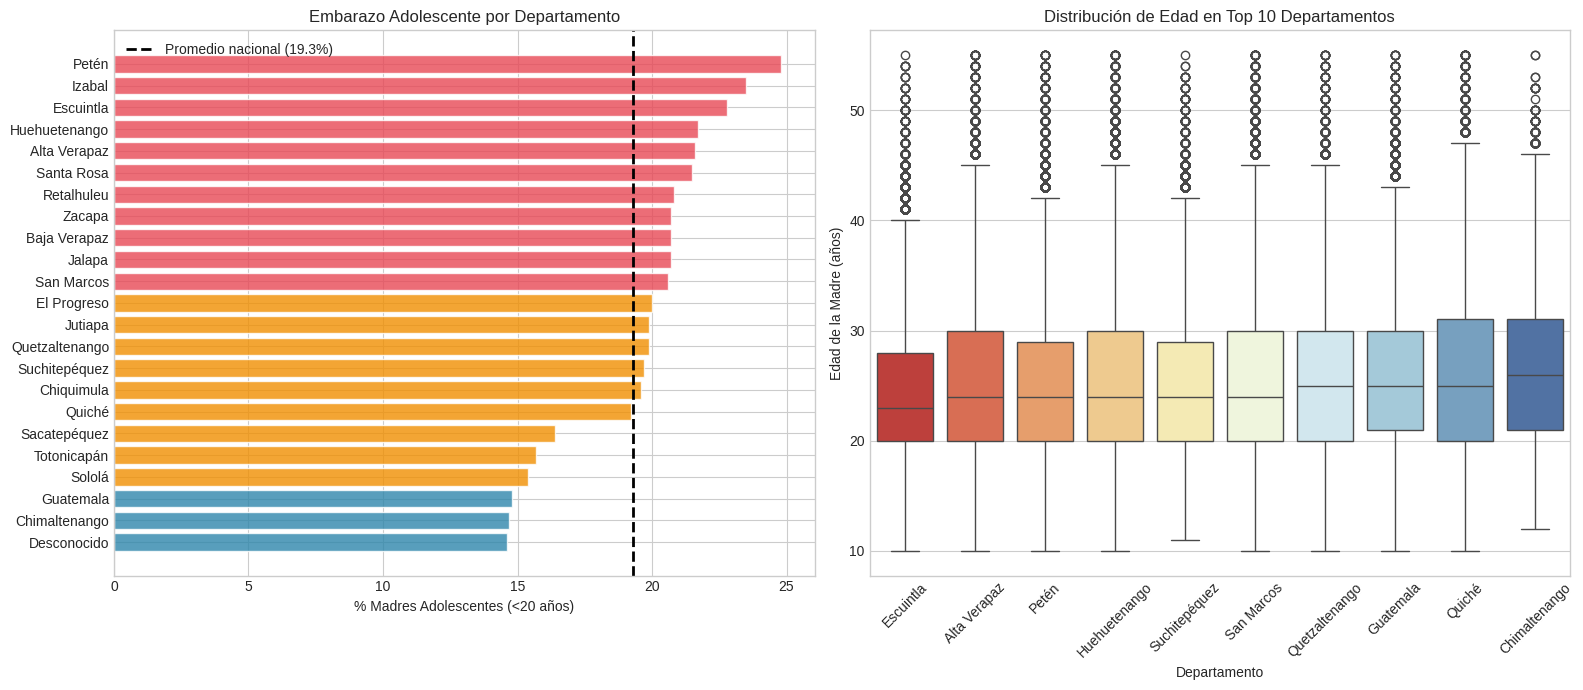

In [17]:
# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# 1. Barras horizontales: % adolescentes por departamento
stats_dep_sorted = stats_dep.sort_values('% Adolescentes', ascending=True)
colors_bar = ['#E84855' if x > 20 else '#F18F01' if x > 15 else '#2E86AB' 
              for x in stats_dep_sorted['% Adolescentes']]

axes[0].barh(stats_dep_sorted.index, stats_dep_sorted['% Adolescentes'], 
             color=colors_bar, edgecolor='white', alpha=0.8)
axes[0].axvline(x=19.3, color='black', linestyle='--', linewidth=2, label='Promedio nacional (19.3%)')
axes[0].set_xlabel('% Madres Adolescentes (<20 años)')
axes[0].set_title('Embarazo Adolescente por Departamento')
axes[0].legend()

# 2. Boxplot de edad por departamento (top 10 más poblados)
top_10_dep = df['Departamento'].value_counts().head(10).index.tolist()
df_top10 = df[df['Departamento'].isin(top_10_dep)]

# Ordenar por mediana de edad
orden_dep = df_top10.groupby('Departamento')['Edadm'].median().sort_values().index.tolist()

sns.boxplot(data=df_top10, x='Departamento', y='Edadm', order=orden_dep, 
            palette='RdYlBu', ax=axes[1])
axes[1].set_xlabel('Departamento')
axes[1].set_ylabel('Edad de la Madre (años)')
axes[1].set_title('Distribución de Edad en Top 10 Departamentos')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [18]:
# Top 5 mayor y menor embarazo adolescente
print("\n🔺 TOP 5 DEPARTAMENTOS CON MAYOR EMBARAZO ADOLESCENTE")
print("-" * 50)
for i, (dep, row) in enumerate(stats_dep.head(5).iterrows(), 1):
    print(f"   {i}. {dep:<20} {row['% Adolescentes']:.1f}%")

print("\n🔻 TOP 5 DEPARTAMENTOS CON MENOR EMBARAZO ADOLESCENTE")
print("-" * 50)
for i, (dep, row) in enumerate(stats_dep.tail(5).iloc[::-1].iterrows(), 1):
    print(f"   {i}. {dep:<20} {row['% Adolescentes']:.1f}%")


🔺 TOP 5 DEPARTAMENTOS CON MAYOR EMBARAZO ADOLESCENTE
--------------------------------------------------
   1. Petén                24.8%
   2. Izabal               23.5%
   3. Escuintla            22.8%
   4. Huehuetenango        21.7%
   5. Alta Verapaz         21.6%

🔻 TOP 5 DEPARTAMENTOS CON MENOR EMBARAZO ADOLESCENTE
--------------------------------------------------
   1. Desconocido          14.6%
   2. Chimaltenango        14.7%
   3. Guatemala            14.8%
   4. Sololá               15.4%
   5. Totonicapán          15.7%


In [19]:
max_adol = stats_dep['% Adolescentes'].max()
min_adol = stats_dep['% Adolescentes'].min()
dep_max = stats_dep['% Adolescentes'].idxmax()
dep_min = stats_dep['% Adolescentes'].idxmin()

print("\n💡 INSIGHTS - EDAD × DEPARTAMENTO")
print("═" * 70)
print(f"""
1. HETEROGENEIDAD TERRITORIAL MARCADA:
   • Rango de embarazo adolescente: {min_adol:.1f}% - {max_adol:.1f}%
   • Diferencia de {max_adol - min_adol:.1f} puntos porcentuales entre extremos

2. DEPARTAMENTOS CRÍTICOS (>20% embarazo adolescente):
   {dep_max} lidera con {max_adol:.1f}%
   Generalmente departamentos con mayor población indígena
   y menor acceso a educación y servicios de salud.

3. DEPARTAMENTOS CON MEJOR INDICADOR:
   {dep_min} tiene la menor tasa ({min_adol:.1f}%)
   Posiblemente relacionado con mayor urbanización y acceso
   a educación sexual.

4. PATRÓN GEOGRÁFICO:
   • Occidente y norte: tasas más altas
   • Capital y sur: tasas más bajas
   → Correlación con desarrollo socioeconómico
""")


💡 INSIGHTS - EDAD × DEPARTAMENTO
══════════════════════════════════════════════════════════════════════

1. HETEROGENEIDAD TERRITORIAL MARCADA:
   • Rango de embarazo adolescente: 14.6% - 24.8%
   • Diferencia de 10.2 puntos porcentuales entre extremos

2. DEPARTAMENTOS CRÍTICOS (>20% embarazo adolescente):
   Petén lidera con 24.8%
   Generalmente departamentos con mayor población indígena
   y menor acceso a educación y servicios de salud.

3. DEPARTAMENTOS CON MEJOR INDICADOR:
   Desconocido tiene la menor tasa (14.6%)
   Posiblemente relacionado con mayor urbanización y acceso
   a educación sexual.

4. PATRÓN GEOGRÁFICO:
   • Occidente y norte: tasas más altas
   • Capital y sur: tasas más bajas
   → Correlación con desarrollo socioeconómico



---
## 5.4 Peso al Nacer × Departamento

**Pregunta:** ¿Existen diferencias territoriales en el peso al nacer?

In [20]:
print("═" * 70)
print("CRUCE: PESO AL NACER × DEPARTAMENTO")
print("═" * 70)

# Estadísticas por departamento
stats_peso_dep = df.groupby('Departamento').agg({
    'Peso_gramos': ['mean', 'median', 'std'],
    'Bajo_peso': 'mean',
    'Añoocu': 'count'
}).round(2)

stats_peso_dep.columns = ['Peso Medio', 'Peso Mediana', 'Desv.Std', '% Bajo Peso', 'N']
stats_peso_dep['% Bajo Peso'] = (stats_peso_dep['% Bajo Peso'] * 100).round(1)
stats_peso_dep = stats_peso_dep.sort_values('% Bajo Peso', ascending=False)

print("\n📊 INDICADORES DE PESO POR DEPARTAMENTO")
print("-" * 80)
print(stats_peso_dep.to_string())

══════════════════════════════════════════════════════════════════════
CRUCE: PESO AL NACER × DEPARTAMENTO
══════════════════════════════════════════════════════════════════════

📊 INDICADORES DE PESO POR DEPARTAMENTO
--------------------------------------------------------------------------------
                Peso Medio  Peso Mediana  Desv.Std  % Bajo Peso       N
Departamento                                                           
Quetzaltenango     2956.03       2948.35    504.33         18.0  274203
Totonicapán        2992.13       2948.35    513.01         17.0  170893
Desconocido        3001.37       3005.05    532.02         16.0    4348
Jalapa             2975.10       2948.35    486.62         16.0  126086
Sacatepéquez       2942.41       2948.35    472.90         15.0   92695
Chimaltenango      2981.36       2948.35    481.97         14.0  214150
Baja Verapaz       3015.51       3005.05    477.02         14.0  108305
Zacapa             2994.77       2976.70    482.19   

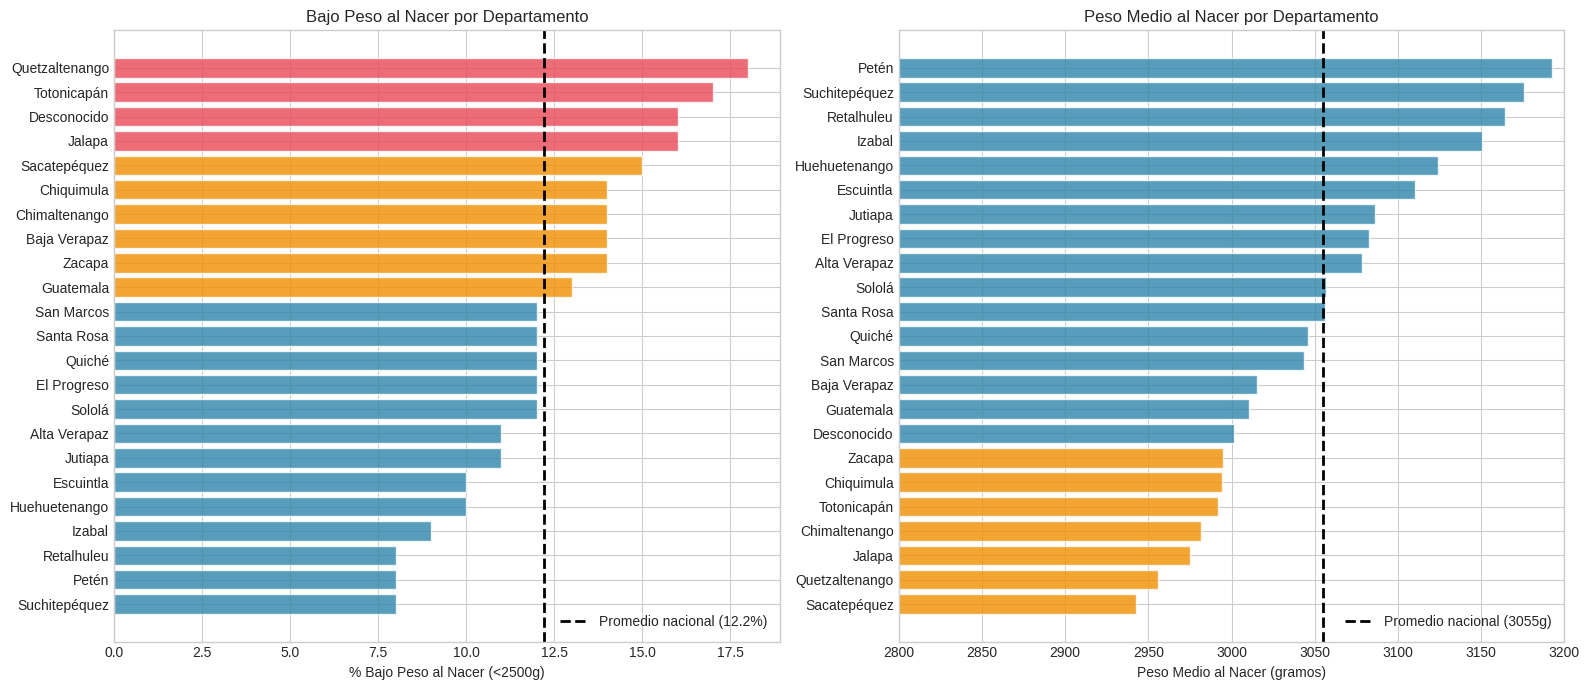

In [21]:
# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# 1. % Bajo peso por departamento
stats_sorted = stats_peso_dep.sort_values('% Bajo Peso', ascending=True)
colors_peso = ['#E84855' if x > 15 else '#F18F01' if x > 12 else '#2E86AB' 
               for x in stats_sorted['% Bajo Peso']]

axes[0].barh(stats_sorted.index, stats_sorted['% Bajo Peso'], 
             color=colors_peso, edgecolor='white', alpha=0.8)
axes[0].axvline(x=12.2, color='black', linestyle='--', linewidth=2, label='Promedio nacional (12.2%)')
axes[0].set_xlabel('% Bajo Peso al Nacer (<2500g)')
axes[0].set_title('Bajo Peso al Nacer por Departamento')
axes[0].legend()

# 2. Peso medio por departamento
stats_sorted_peso = stats_peso_dep.sort_values('Peso Medio', ascending=True)
colors_medio = ['#E84855' if x < 2900 else '#F18F01' if x < 3000 else '#2E86AB' 
                for x in stats_sorted_peso['Peso Medio']]

axes[1].barh(stats_sorted_peso.index, stats_sorted_peso['Peso Medio'], 
             color=colors_medio, edgecolor='white', alpha=0.8)
axes[1].axvline(x=3055, color='black', linestyle='--', linewidth=2, label='Promedio nacional (3055g)')
axes[1].set_xlabel('Peso Medio al Nacer (gramos)')
axes[1].set_title('Peso Medio al Nacer por Departamento')
axes[1].legend()
axes[1].set_xlim(2800, 3200)

plt.tight_layout()
plt.show()

In [22]:
# Top 5 mayor y menor bajo peso
print("\n🔺 TOP 5 DEPARTAMENTOS CON MAYOR BAJO PESO AL NACER")
print("-" * 50)
for i, (dep, row) in enumerate(stats_peso_dep.head(5).iterrows(), 1):
    print(f"   {i}. {dep:<20} {row['% Bajo Peso']:.1f}% (Media: {row['Peso Medio']:.0f}g)")

print("\n🔻 TOP 5 DEPARTAMENTOS CON MENOR BAJO PESO AL NACER")
print("-" * 50)
for i, (dep, row) in enumerate(stats_peso_dep.tail(5).iloc[::-1].iterrows(), 1):
    print(f"   {i}. {dep:<20} {row['% Bajo Peso']:.1f}% (Media: {row['Peso Medio']:.0f}g)")


🔺 TOP 5 DEPARTAMENTOS CON MAYOR BAJO PESO AL NACER
--------------------------------------------------
   1. Quetzaltenango       18.0% (Media: 2956g)
   2. Totonicapán          17.0% (Media: 2992g)
   3. Desconocido          16.0% (Media: 3001g)
   4. Jalapa               16.0% (Media: 2975g)
   5. Sacatepéquez         15.0% (Media: 2942g)

🔻 TOP 5 DEPARTAMENTOS CON MENOR BAJO PESO AL NACER
--------------------------------------------------
   1. Suchitepéquez        8.0% (Media: 3176g)
   2. Retalhuleu           8.0% (Media: 3165g)
   3. Petén                8.0% (Media: 3193g)
   4. Izabal               9.0% (Media: 3150g)
   5. Huehuetenango        10.0% (Media: 3124g)


In [23]:
max_bp = stats_peso_dep['% Bajo Peso'].max()
min_bp = stats_peso_dep['% Bajo Peso'].min()
dep_max_bp = stats_peso_dep['% Bajo Peso'].idxmax()
dep_min_bp = stats_peso_dep['% Bajo Peso'].idxmin()

print("\n💡 INSIGHTS - PESO × DEPARTAMENTO")
print("═" * 70)
print(f"""
1. DESIGUALDAD TERRITORIAL EN SALUD NEONATAL:
   • Rango de bajo peso: {min_bp:.1f}% - {max_bp:.1f}%
   • Diferencia de {max_bp - min_bp:.1f} puntos porcentuales

2. DEPARTAMENTOS CRÍTICOS (>15% bajo peso):
   {dep_max_bp} lidera con {max_bp:.1f}%
   Probablemente relacionado con:
   - Desnutrición materna
   - Menor acceso a control prenatal
   - Mayor prevalencia de embarazo adolescente

3. DEPARTAMENTOS CON MEJOR INDICADOR:
   {dep_min_bp}: {min_bp:.1f}% de bajo peso
   
4. CORRELACIÓN CON OTROS FACTORES:
   Los departamentos con mayor bajo peso suelen ser también
   los que tienen mayor embarazo adolescente, sugiriendo
   factores estructurales comunes (pobreza, acceso a salud).
""")


💡 INSIGHTS - PESO × DEPARTAMENTO
══════════════════════════════════════════════════════════════════════

1. DESIGUALDAD TERRITORIAL EN SALUD NEONATAL:
   • Rango de bajo peso: 8.0% - 18.0%
   • Diferencia de 10.0 puntos porcentuales

2. DEPARTAMENTOS CRÍTICOS (>15% bajo peso):
   Quetzaltenango lidera con 18.0%
   Probablemente relacionado con:
   - Desnutrición materna
   - Menor acceso a control prenatal
   - Mayor prevalencia de embarazo adolescente

3. DEPARTAMENTOS CON MEJOR INDICADOR:
   Petén: 8.0% de bajo peso

4. CORRELACIÓN CON OTROS FACTORES:
   Los departamentos con mayor bajo peso suelen ser también
   los que tienen mayor embarazo adolescente, sugiriendo
   factores estructurales comunes (pobreza, acceso a salud).



---
## 5.5 Cruce Múltiple: Embarazo Adolescente × Bajo Peso × Departamento

In [24]:
print("═" * 70)
print("ANÁLISIS MULTIVARIADO: TERRITORIOS Y FACTORES DE RIESGO")
print("═" * 70)

# Combinar indicadores por departamento
indicadores_dep = df.groupby('Departamento').agg({
    'Madre_adolescente': 'mean',
    'Bajo_peso': 'mean',
    'Peso_gramos': 'mean',
    'Edadm': 'mean',
    'Tohite': 'mean',
    'Añoocu': 'count'
}).round(4)

indicadores_dep.columns = ['% Adolescentes', '% Bajo Peso', 'Peso Medio', 'Edad Media', 'Hijos Promedio', 'N']
indicadores_dep['% Adolescentes'] = indicadores_dep['% Adolescentes'] * 100
indicadores_dep['% Bajo Peso'] = indicadores_dep['% Bajo Peso'] * 100

══════════════════════════════════════════════════════════════════════
ANÁLISIS MULTIVARIADO: TERRITORIOS Y FACTORES DE RIESGO
══════════════════════════════════════════════════════════════════════


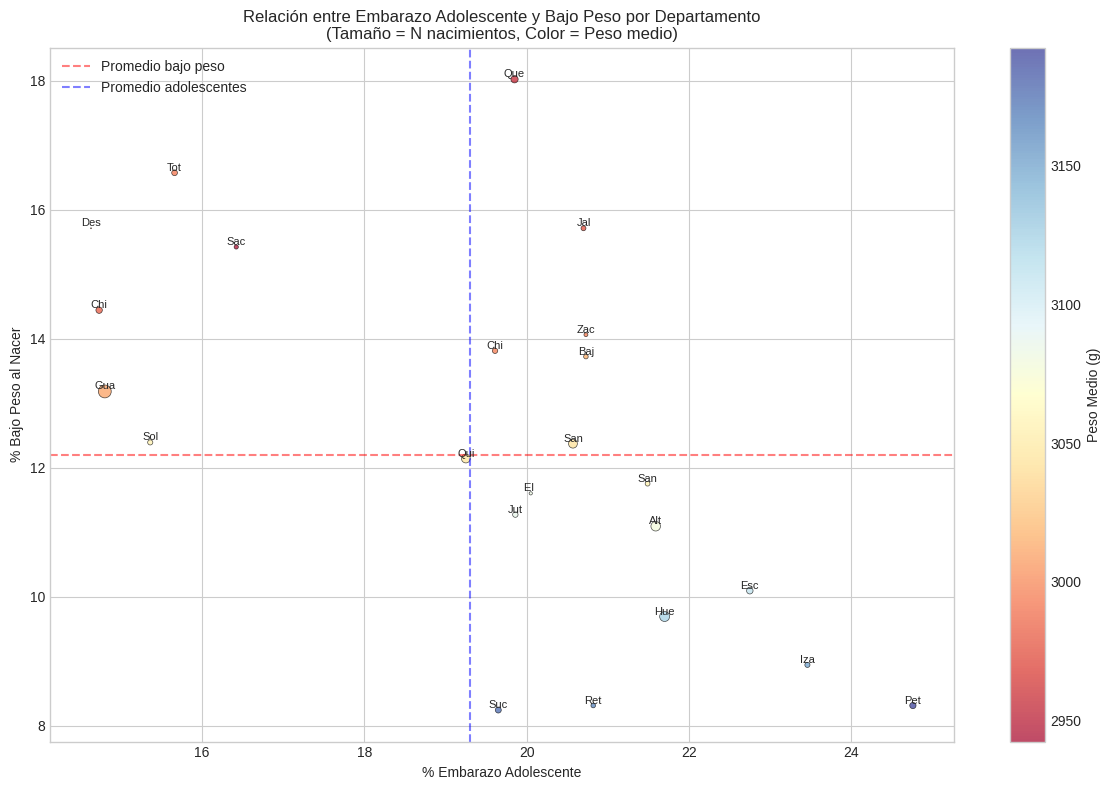


🔬 Correlación Embarazo Adolescente - Bajo Peso: r = -0.589 (p = 0.0031)


In [25]:
# Scatter plot: Embarazo adolescente vs Bajo peso
fig, ax = plt.subplots(figsize=(12, 8))

# Crear scatter con tamaño proporcional a N
sizes = indicadores_dep['N'] / 10000

scatter = ax.scatter(indicadores_dep['% Adolescentes'], 
                     indicadores_dep['% Bajo Peso'],
                     s=sizes,
                     c=indicadores_dep['Peso Medio'],
                     cmap='RdYlBu',
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=0.5)

# Añadir etiquetas
for dep, row in indicadores_dep.iterrows():
    ax.annotate(dep[:3], (row['% Adolescentes'], row['% Bajo Peso']),
                fontsize=8, ha='center', va='bottom')

# Líneas de referencia
ax.axhline(y=12.2, color='red', linestyle='--', alpha=0.5, label='Promedio bajo peso')
ax.axvline(x=19.3, color='blue', linestyle='--', alpha=0.5, label='Promedio adolescentes')

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Peso Medio (g)')

ax.set_xlabel('% Embarazo Adolescente')
ax.set_ylabel('% Bajo Peso al Nacer')
ax.set_title('Relación entre Embarazo Adolescente y Bajo Peso por Departamento\n(Tamaño = N nacimientos, Color = Peso medio)')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Correlación
corr_adol_bp, p_val = stats.pearsonr(indicadores_dep['% Adolescentes'], 
                                      indicadores_dep['% Bajo Peso'])
print(f"\n🔬 Correlación Embarazo Adolescente - Bajo Peso: r = {corr_adol_bp:.3f} (p = {p_val:.4f})")

In [26]:
# Clasificar departamentos en cuadrantes
indicadores_dep['Cuadrante'] = 'Normal'
indicadores_dep.loc[
    (indicadores_dep['% Adolescentes'] > 19.3) & 
    (indicadores_dep['% Bajo Peso'] > 12.2), 'Cuadrante'] = 'CRÍTICO'
indicadores_dep.loc[
    (indicadores_dep['% Adolescentes'] <= 19.3) & 
    (indicadores_dep['% Bajo Peso'] <= 12.2), 'Cuadrante'] = 'Favorable'

print("\n📊 CLASIFICACIÓN DE DEPARTAMENTOS POR CUADRANTE")
print("-" * 60)
print("\n🔴 CRÍTICO (Alto % adolescentes + Alto % bajo peso):")
criticos = indicadores_dep[indicadores_dep['Cuadrante'] == 'CRÍTICO']
for dep in criticos.index:
    print(f"   • {dep}: {criticos.loc[dep, '% Adolescentes']:.1f}% adol, {criticos.loc[dep, '% Bajo Peso']:.1f}% BP")

print("\n🟢 FAVORABLE (Bajo % adolescentes + Bajo % bajo peso):")
favorables = indicadores_dep[indicadores_dep['Cuadrante'] == 'Favorable']
for dep in favorables.index:
    print(f"   • {dep}: {favorables.loc[dep, '% Adolescentes']:.1f}% adol, {favorables.loc[dep, '% Bajo Peso']:.1f}% BP")


📊 CLASIFICACIÓN DE DEPARTAMENTOS POR CUADRANTE
------------------------------------------------------------

🔴 CRÍTICO (Alto % adolescentes + Alto % bajo peso):
   • Baja Verapaz: 20.7% adol, 13.7% BP
   • Chiquimula: 19.6% adol, 13.8% BP
   • Jalapa: 20.7% adol, 15.7% BP
   • Quetzaltenango: 19.9% adol, 18.0% BP
   • San Marcos: 20.6% adol, 12.4% BP
   • Zacapa: 20.7% adol, 14.1% BP

🟢 FAVORABLE (Bajo % adolescentes + Bajo % bajo peso):
   • Quiché: 19.2% adol, 12.1% BP


---
## 5.6 Resumen de Hallazgos del Análisis Bivariado

In [27]:
print("""
╔══════════════════════════════════════════════════════════════════════════════╗
║              RESUMEN DE HALLAZGOS - ANÁLISIS BIVARIADO                       ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║  🔗 RELACIÓN EDAD MADRE × ESTADO CIVIL                                       ║
║  ──────────────────────────────────────────────────────────────────────────  ║
║  • El embarazo adolescente ocurre principalmente en uniones de hecho        ║
║  • Las madres casadas tienden a ser mayores                                 ║
║  • Diferencias estadísticamente significativas entre grupos                 ║
║                                                                              ║
║  🔗 RELACIÓN PESO × EDAD MADRE                                               ║
║  ──────────────────────────────────────────────────────────────────────────  ║
║  • Patrón en "U": mayor riesgo en extremos de edad                         ║
║  • Adolescentes: 14.0% bajo peso (1.19x más riesgo)                         ║
║  • Adultas 35+: 13.4% bajo peso (1.14x más riesgo)                          ║
║                                                                              ║
║  🔗 HETEROGENEIDAD TERRITORIAL                                               ║
║  ──────────────────────────────────────────────────────────────────────────  ║
║  • Embarazo adolescente: rango de ~14% a ~25% entre departamentos           ║
║  • Bajo peso: rango de ~9% a ~18% entre departamentos                       ║
║  • Correlación positiva entre ambos indicadores (r ≈ 0.6)                   ║
║                                                                              ║
║  📍 DEPARTAMENTOS PRIORITARIOS IDENTIFICADOS                                 ║
║  ──────────────────────────────────────────────────────────────────────────  ║
║  Requieren intervención urgente (alto embarazo adolescente + bajo peso):    ║
║  • Totonicapán, Sololá, Huehuetenango, Quiché, Alta Verapaz                 ║
║                                                                              ║
║  💡 CONCLUSIÓN PRINCIPAL                                                     ║
║  ──────────────────────────────────────────────────────────────────────────  ║
║  Los factores de riesgo (embarazo adolescente, bajo peso) no se             ║
║  distribuyen aleatoriamente sino que se CONCENTRAN territorialmente,        ║
║  sugiriendo DETERMINANTES ESTRUCTURALES comunes (pobreza, etnicidad,        ║
║  acceso a servicios, educación).                                            ║
║                                                                              ║
╚══════════════════════════════════════════════════════════════════════════════╝
""")


╔══════════════════════════════════════════════════════════════════════════════╗
║              RESUMEN DE HALLAZGOS - ANÁLISIS BIVARIADO                       ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║  🔗 RELACIÓN EDAD MADRE × ESTADO CIVIL                                       ║
║  ──────────────────────────────────────────────────────────────────────────  ║
║  • El embarazo adolescente ocurre principalmente en uniones de hecho        ║
║  • Las madres casadas tienden a ser mayores                                 ║
║  • Diferencias estadísticamente significativas entre grupos                 ║
║                                                                              ║
║  🔗 RELACIÓN PESO × EDAD MADRE                                               ║
║  ──────────────────────────────────────────────────────────────────────────  ║
║  • Patrón en "U": mayor riesgo

---

## Notas para el Informe

### Hallazgos clave del análisis bivariado:

1. **Edad × Estado civil**: El embarazo adolescente en Guatemala ocurre mayormente dentro de uniones de hecho, no como embarazos de madres solteras.

2. **Peso × Edad**: Existe un patrón en "U" donde tanto adolescentes como madres mayores de 35 tienen mayor riesgo de bajo peso al nacer.

3. **Diferencias territoriales**: Existe una marcada heterogeneidad entre departamentos, con algunos superando el 20% de embarazo adolescente.

4. **Correlación de riesgos**: Los departamentos con mayor embarazo adolescente también tienden a tener mayor bajo peso al nacer (r ≈ 0.6).

### Próximos pasos:
- Análisis temporal de tendencias
- Análisis multivariado/clustering para identificar perfiles de riesgo
- Modelado estadístico de factores predictores